## Create Matriz X

In [87]:
set.seed(123)        # set MC seed
n = 10

In [88]:
V1 = rnorm(10)
V2 = rnorm(10)
V3 = rnorm(10)
V4 = rnorm(10)
V5 = rnorm(10)
V6 = rnorm(10)
V7 = rnorm(10)
V8 = rnorm(10)
V9 = rnorm(10)

In [89]:
V10 = V1+V2+V3
V10

[1] -0.40421756 -0.08833858  0.93347532 -0.54770012 -1.05159267  1.81528481
 [7]  1.79655373 -3.07830527 -1.12363389  0.33536154

In [90]:
X <- matrix( c(V1,V2,V3,V4,V5,V6,V7,V8,V9,V10), nrow=10, ncol = 10, byrow=FALSE)
head(X)

-0.56047565,1.2240818,-1.0678237,0.4264642,-0.6947070,0.25331851,0.3796395,-0.4910312,0.005764186,-0.40421756
-0.23017749,0.3598138,-0.2179749,-0.2950715,-0.2079173,-0.02854676,-0.5023235,-2.3091689,0.385280401,-0.08833858
1.55870831,0.4007715,-1.0260044,0.8951257,-1.2653964,-0.04287046,-0.3332074,1.0057385,-0.370660032,0.93347532
0.07050839,0.1106827,-0.7288912,0.8781335,2.1689560,1.36860228,-1.0185754,-0.7092008,0.644376549,-0.54770012
0.12928774,-0.5558411,-0.6250393,0.8215811,1.2079620,-0.22577099,-1.0717912,-0.6880086,-0.220486562,-1.05159267
1.71506499,1.7869131,-1.6866933,0.6886403,-1.1231086,1.51647060,0.3035286,1.0255714,0.331781964,1.81528481


In [91]:
solve( X )

ERROR: Error in solve.default(X): system is computationally singular: reciprocal condition number = 4.21242e-18


# Analyzing RCT data with Precision Adjustment

In [92]:
## loading the data
Penn <- as.data.frame(read.table("../data/penn_jae.dat", header=T ))
n <- dim(Penn)[1] #obs
p_1 <- dim(Penn)[2] #vars
dim(Penn)

[1] 13913    23

In [93]:
Penn<- subset(Penn, tg==2 | tg==0)
attach(Penn)

The following objects are masked from Penn (pos = 18):

    abdt, agegt54, agelt35, black, dep, durable, female, hispanic,
    husd, inuidur1, inuidur2, lusd, muld, nondurable, othrace, q1, q2,
    q3, q4, q5, q6, recall, tg




In [94]:
T2<- (tg==2)
summary(T2) # summary of the treatment 2: has more values of controls (3354) tha treatment (2428)

   Mode   FALSE    TRUE 
logical    3354    2428 

In [95]:
head(Penn)

,abdt,tg,inuidur1,inuidur2,female,black,hispanic,othrace,dep,q1,...,q5,q6,recall,agelt35,agegt54,durable,nondurable,lusd,husd,muld
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,10824,0,18,18,0,0,0,0,2,0,...,1,0,0,0,0,0,0,0,1,0
2,10635,2,7,3,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,10824,0,1,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
5,10747,0,27,27,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
10,10754,2,20,20,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
13,10831,0,27,27,0,0,0,0,1,0,...,1,0,0,0,1,1,0,1,0,0


### Plot two histograms for treatment and control group to see the distribution of the outcome variable inuidur1

We prefered to plot one graph that contained both histograms.

In [96]:
pen_cont = Penn[Penn$tg==0,]
pen_tr = Penn[Penn$tg==2,]
head(pen_cont)

,abdt,tg,inuidur1,inuidur2,female,black,hispanic,othrace,dep,q1,...,q5,q6,recall,agelt35,agegt54,durable,nondurable,lusd,husd,muld
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,10824,0,18,18,0,0,0,0,2,0,...,1,0,0,0,0,0,0,0,1,0
4,10824,0,1,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
5,10747,0,27,27,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
13,10831,0,27,27,0,0,0,0,1,0,...,1,0,0,0,1,1,0,1,0,0
14,10845,0,27,27,1,0,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0
15,10831,0,9,9,1,0,0,0,1,0,...,1,0,0,0,1,0,0,1,0,0


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



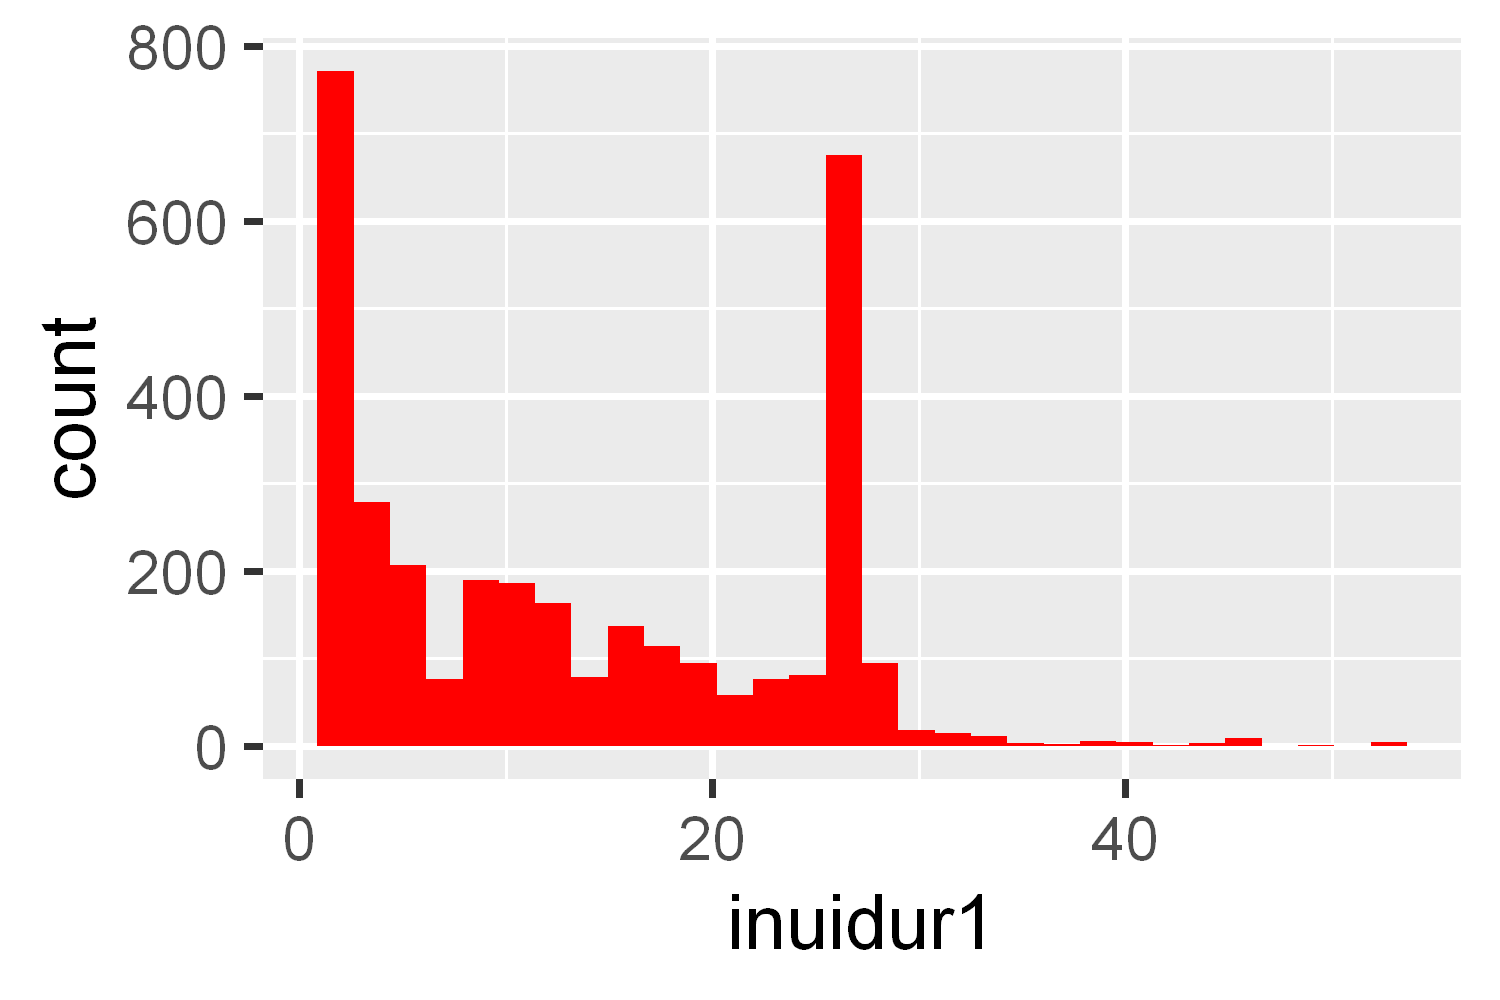

In [97]:
library(ggplot2)
ggplot(NULL, aes(inuidur1)) +geom_histogram(data=pen_cont, fill="red", binwidth=)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



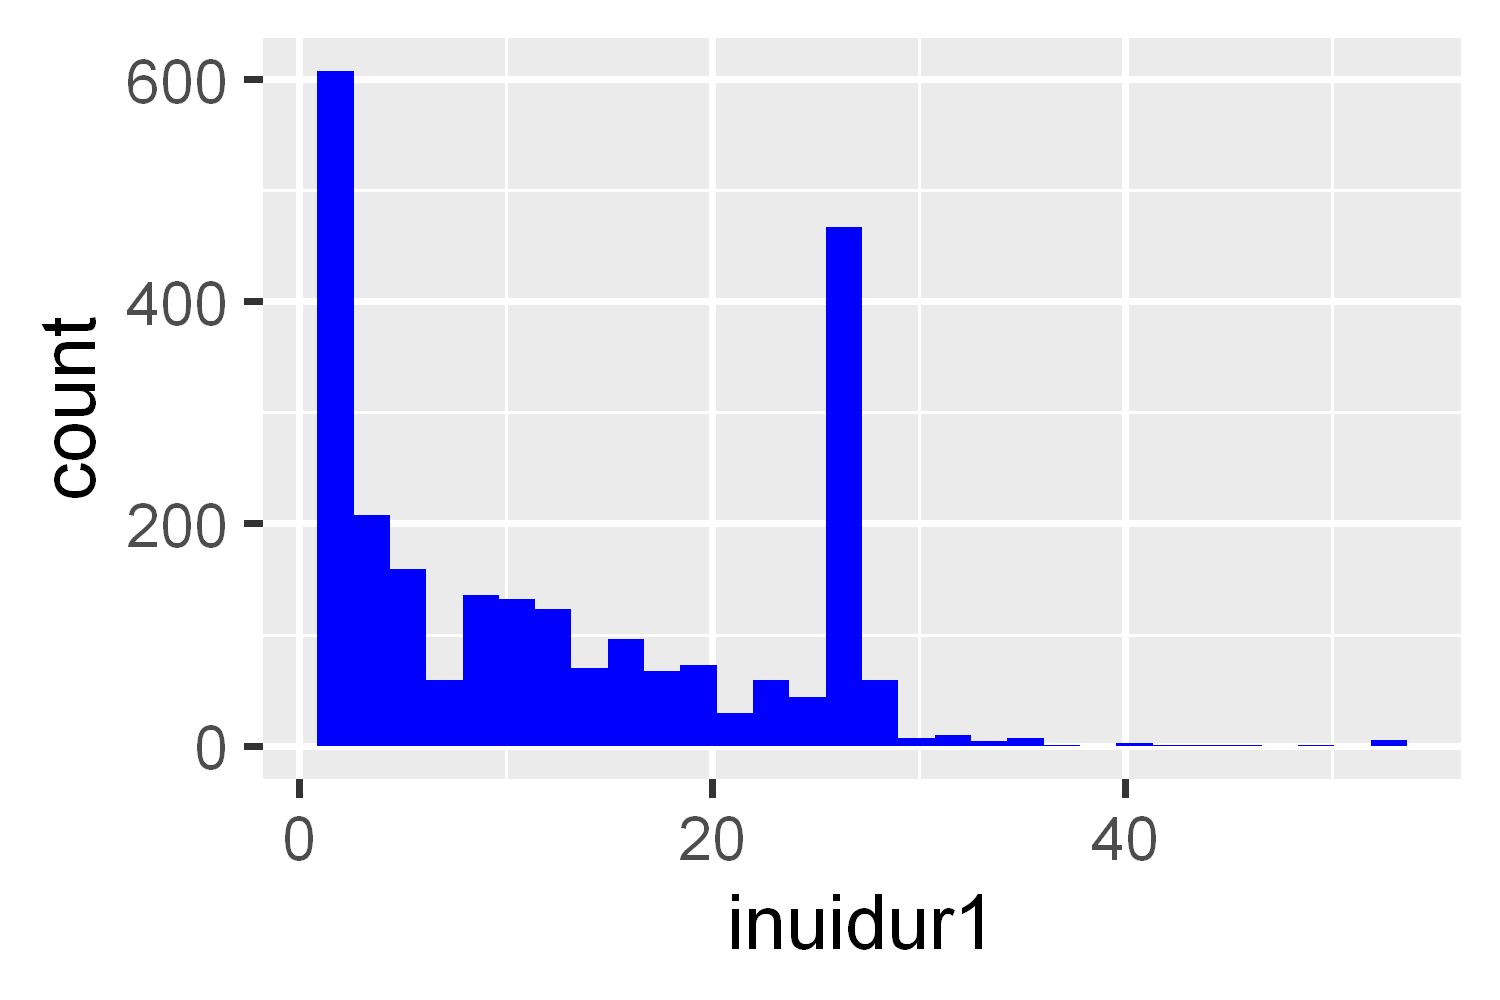

In [98]:
ggplot(NULL, aes(inuidur1)) + geom_histogram(data=pen_tr, fill="blue")

The distribution of the treatment and control group is very similar, thought the control group normally has a number of weeks of the first spell of unemployment smaller than the treatment group (probably because it has more observations than the treatment group).

### Model 
To evaluate the impact of the **treatment two** on unemployment duration, we consider the linear regression model:

$$
Y =  D \beta_1 + W'\beta_2 + \varepsilon, \quad E \varepsilon (D,W')' = 0,
$$

where $Y$ is  the  log of duration of unemployment (inudir1) , $D$ is a treatment  indicator (2),  and $W$ is a set of controls including age group dummies, gender, race, number of dependents, quarter of the experiment, location within the state, existence of recall expectations, and type of occupation.   Here $\beta_1$ is the ATE, if the RCT assumptions hold rigorously.


We also consider interactive regression model:

$$
Y =  D \alpha_1 + D W' \alpha_2 + W'\beta_2 + \varepsilon, \quad E \varepsilon (D,W', DW')' = 0,
$$
where $W$'s are demeaned (apart from the intercept), so that $\alpha_1$ is the ATE, if the RCT assumptions hold rigorously.

Under RCT, the projection coefficient $\beta_1$ has
the interpretation of the causal effect of the treatment on
the average outcome. We thus refer to $\beta_1$ as the average
treatment effect (ATE). 

Note that the covariates, here are
independent of the treatment $D$, so we can identify $\beta_1$ by
just linear regression of $Y$ on $D$, without adding covariates. This is proven in the balance check. 

However we do add covariates in an effort to improve the
precision of our estimates of the average treatment effect.

### Analysis

We consider 

*  classical 2-sample approach, no adjustment (CL)
*  classical linear regression adjustment (CRA)
*  interactive regression adjusment (IRA) 
*  interactive regression adjusment using Lasso

and carry out robust inference using the *estimatr* R packages. *Also, we will plot the coefficients of the next variables*:

* T2*female
* T2*black
* T2*agelt35
* T2*factor(dep)1

# Carry out covariate balance check

In [99]:
library(lmtest)
library(sandwich)
m <- lm(T2~(female+black+othrace+factor(dep)+q2+q3+q4+q5+q6+agelt35+agegt54+durable+lusd+husd)^2)
coeftest(m, vcov = vcovHC(m, type="HC1"))


t test of coefficients:

                       Estimate Std. Error t value  Pr(>|t|)    
(Intercept)           0.5171342  0.1568823  3.2963 0.0009856 ***
female                0.0056240  0.1324597  0.0425 0.9661352    
black                -0.0307771  0.0847262 -0.3633 0.7164293    
othrace              -0.4278818  0.3005502 -1.4237 0.1545993    
factor(dep)1          0.1576567  0.1851798  0.8514 0.3945992    
factor(dep)2         -0.1927958  0.1508926 -1.2777 0.2014067    
q2                   -0.1092161  0.1583768 -0.6896 0.4904762    
q3                   -0.1075663  0.1579864 -0.6809 0.4959890    
q4                   -0.0621302  0.1581168 -0.3929 0.6943797    
q5                   -0.0498684  0.1575034 -0.3166 0.7515450    
q6                   -0.2176336  0.1558290 -1.3966 0.1625831    
agelt35              -0.0643464  0.1326376 -0.4851 0.6276032    
agegt54               0.0259251  0.2395371  0.1082 0.9138171    
durable              -0.1256397  0.1763853 -0.7123 0.4763064    

In [100]:
# get same dataframe
X <- as.data.frame( model.matrix(m) )
head(X) # the matrix used in the regression
length(X)

,(Intercept),female,black,othrace,factor(dep)1,factor(dep)2,q2,q3,q4,q5,...,agelt35:agegt54,agelt35:durable,agelt35:lusd,agelt35:husd,agegt54:durable,agegt54:lusd,agegt54:husd,durable:lusd,durable:husd,lusd:husd
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5,1,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,1,0,0,0,0,1,...,0,0,0,0,1,1,0,1,0,0


[1] 120

In [101]:
no_col <- attributes(m$coefficients)$names[is.na(m$coefficients)] #save the name of variables 
X1  <- X[, -which(names( X ) %in% no_col ) ] #save in a data frame this variables
head(X1)

,(Intercept),female,black,othrace,factor(dep)1,factor(dep)2,q2,q3,q4,q5,...,q6:agegt54,q6:durable,agelt35:durable,agelt35:lusd,agelt35:husd,agegt54:durable,agegt54:lusd,agegt54:husd,durable:lusd,durable:husd
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5,1,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,1,1,0,1,0


In [102]:
save( X1, file = "../data/lab3_sol.RData")

# Model Specification

### No adjustment (2-sample approach) & classical linear regression adjustment (CRA)

In [103]:
formula_cl <- log(inuidur1)~T2

# adding controls
formula_cra <- log(inuidur1)~T2+ (female+black+othrace+factor(dep)+q2+q3+q4+q5+q6+agelt35+agegt54+durable+lusd+husd)^2
# Omitted dummies: q1, nondurable, muld

#No adjustment (2-sample approach): like comparing the means of the control and the treatment group
ols.cl_reg <- lm(formula_cl)

# (CRA)
ols.cra_reg <- lm(formula_cra)

ols.cl = coeftest(ols.cl_reg, vcov = vcovHC(ols.cl_reg, type="HC1"))
ols.cra = coeftest(ols.cra_reg, vcov = vcovHC(ols.cra_reg, type="HC1"))

In [120]:
ols.cl


t test of coefficients:

             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.056830   0.020954 98.1580  < 2e-16 ***
T2TRUE      -0.078825   0.032509 -2.4247  0.01535 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


In [104]:
# (2-sample approach):
print(ols.cl)
# (CRA)
print(ols.cra)


t test of coefficients:

             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.056830   0.020954 98.1580  < 2e-16 ***
T2TRUE      -0.078825   0.032509 -2.4247  0.01535 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


t test of coefficients:

                       Estimate Std. Error t value  Pr(>|t|)    
(Intercept)           2.4471832  0.3580899  6.8340 9.123e-12 ***
T2TRUE               -0.0712066  0.0320440 -2.2222 0.0263124 *  
female               -0.9428048  0.2827961 -3.3339 0.0008620 ***
black                -0.6654258  0.2430567 -2.7377 0.0062056 ** 
othrace              -1.5494550  0.7312071 -2.1190 0.0341306 *  
factor(dep)1          0.2798498  0.3783316  0.7397 0.4595160    
factor(dep)2          0.1678164  0.3678718  0.4562 0.6482768    
q2                    0.0271228  0.3606226  0.0752 0.9400495    
q3                   -0.3542370  0.3601780 -0.9835 0.3254005    
q4                   -0.3380244  0.3606994 -0.9371 0.3487284    
q5 

In [105]:
# get same dataframe for ols.cl
X <- as.data.frame( model.matrix(ols.cl_reg) )

no_col <- attributes(ols.cl_reg$coefficients)$names[is.na(ols.cl_reg$coefficients)]

X1  <- X[, -which(names( X ) %in% no_col ) ]

save( X1, file = "../data/ols_cl_reg_sol.RData")

# get same dataframe for ols.cra
X <- as.data.frame( model.matrix(ols.cra_reg) )

no_col <- attributes(ols.cra_reg$coefficients)$names[is.na(ols.cra_reg$coefficients)]

X1  <- X[, -which(names( X ) %in% no_col ) ]

save( X1, file = "../data/ols_cra_reg_sol.RData")


The interactive specificaiton corresponds to the approach introduced in Lin (2013).

### Interactive regression model

In [121]:
X = model.matrix (~ (female+black+othrace+factor(dep)+q2+q3+q4+q5+q6+agelt35+agegt54+durable+lusd+husd)^2)[,-1]
dim(X) # we have 119 variables

[1] 5782  119

In [122]:
demean<- function(x){ x - mean(x)} #create a function that demeans the variables 
X = apply(X, 2, demean) # apply it to the data base
head(X)

,female,black,othrace,factor(dep)1,factor(dep)2,q2,q3,q4,q5,q6,...,agelt35:agegt54,agelt35:durable,agelt35:lusd,agelt35:husd,agegt54:durable,agegt54:lusd,agegt54:husd,durable:lusd,durable:husd,lusd:husd
1,-0.4007264,-0.118817,-0.005188516,-0.1165687,0.839329,-0.2001038,-0.2355586,-0.2232791,0.7367693,-0.06520235,...,0,-0.07350398,-0.1324801,-0.1219301,-0.01885161,-0.0325147,-0.02767209,-0.05499827,-0.02905569,0
2,-0.4007264,-0.118817,-0.005188516,-0.1165687,-0.160671,-0.2001038,0.7644414,-0.2232791,-0.2632307,-0.06520235,...,0,-0.07350398,0.8675199,-0.1219301,-0.01885161,-0.0325147,-0.02767209,-0.05499827,-0.02905569,0
3,-0.4007264,-0.118817,-0.005188516,-0.1165687,-0.160671,-0.2001038,-0.2355586,-0.2232791,0.7367693,-0.06520235,...,0,-0.07350398,-0.1324801,-0.1219301,-0.01885161,-0.0325147,-0.02767209,-0.05499827,-0.02905569,0
4,-0.4007264,-0.118817,-0.005188516,-0.1165687,-0.160671,-0.2001038,-0.2355586,0.7767209,-0.2632307,-0.06520235,...,0,-0.07350398,-0.1324801,-0.1219301,-0.01885161,-0.0325147,-0.02767209,-0.05499827,-0.02905569,0
5,0.5992736,-0.118817,-0.005188516,-0.1165687,-0.160671,-0.2001038,-0.2355586,0.7767209,-0.2632307,-0.06520235,...,0,-0.07350398,-0.1324801,-0.1219301,-0.01885161,-0.0325147,-0.02767209,-0.05499827,-0.02905569,0
6,-0.4007264,-0.118817,-0.005188516,0.8834313,-0.160671,-0.2001038,-0.2355586,-0.2232791,0.7367693,-0.06520235,...,0,-0.07350398,-0.1324801,-0.1219301,0.98114839,0.9674853,-0.02767209,0.94500173,-0.02905569,0


In [123]:
ols.ira_reg = lm(log(inuidur1) ~ T2*X) #interactions of all the variables with the treatment
ols.ira= coeftest(ols.ira_reg, vcov = vcovHC(ols.ira_reg, type="HC1")) # correct the EE 
print(ols.ira)


t test of coefficients:

                           Estimate Std. Error  t value  Pr(>|t|)    
(Intercept)               2.0263431  0.0158116 128.1556 < 2.2e-16 ***
T2                       -0.0699044  0.0320764  -2.1793 0.0293503 *  
Xfemale                  -0.9433273  0.2828151  -3.3355 0.0008570 ***
Xblack                   -0.6734467  0.2450385  -2.7483 0.0060092 ** 
Xothrace                 -2.8890389  0.5954889  -4.8515 1.258e-06 ***
Xfactor(dep)1             0.3565813  0.4194870   0.8500 0.3953385    
Xfactor(dep)2             0.1902699  0.3735550   0.5093 0.6105277    
Xq2                       0.1220052  0.3591173   0.3397 0.7340679    
Xq3                      -0.2448805  0.3585870  -0.6829 0.4946958    
Xq4                      -0.2325918  0.3589780  -0.6479 0.5170583    
Xq5                      -0.0706375  0.3580735  -0.1973 0.8436227    
Xq6                      -0.3489823  0.3608200  -0.9672 0.3334899    
Xagelt35                 -0.2059965  0.3138224  -0.6564 0.511586

In [109]:
# get same dataframe for ols.ira
S <- as.data.frame( model.matrix(ols.ira_reg) )
head(S) 

,(Intercept),T2TRUE,Xfemale,Xblack,Xothrace,Xfactor(dep)1,Xfactor(dep)2,Xq2,Xq3,Xq4,...,T2TRUE:Xagelt35:agegt54,T2TRUE:Xagelt35:durable,T2TRUE:Xagelt35:lusd,T2TRUE:Xagelt35:husd,T2TRUE:Xagegt54:durable,T2TRUE:Xagegt54:lusd,T2TRUE:Xagegt54:husd,T2TRUE:Xdurable:lusd,T2TRUE:Xdurable:husd,T2TRUE:Xlusd:husd
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,0,-0.4007264,-0.118817,-0.005188516,-0.1165687,0.839329,-0.2001038,-0.2355586,-0.2232791,...,0,0.00000000,0.0000000,0.0000000,0.00000000,0.0000000,0.00000000,0.00000000,0.00000000,0
2,1,1,-0.4007264,-0.118817,-0.005188516,-0.1165687,-0.160671,-0.2001038,0.7644414,-0.2232791,...,0,-0.07350398,0.8675199,-0.1219301,-0.01885161,-0.0325147,-0.02767209,-0.05499827,-0.02905569,0
3,1,0,-0.4007264,-0.118817,-0.005188516,-0.1165687,-0.160671,-0.2001038,-0.2355586,-0.2232791,...,0,0.00000000,0.0000000,0.0000000,0.00000000,0.0000000,0.00000000,0.00000000,0.00000000,0
4,1,0,-0.4007264,-0.118817,-0.005188516,-0.1165687,-0.160671,-0.2001038,-0.2355586,0.7767209,...,0,0.00000000,0.0000000,0.0000000,0.00000000,0.0000000,0.00000000,0.00000000,0.00000000,0
5,1,1,0.5992736,-0.118817,-0.005188516,-0.1165687,-0.160671,-0.2001038,-0.2355586,0.7767209,...,0,-0.07350398,-0.1324801,-0.1219301,-0.01885161,-0.0325147,-0.02767209,-0.05499827,-0.02905569,0
6,1,0,-0.4007264,-0.118817,-0.005188516,0.8834313,-0.160671,-0.2001038,-0.2355586,-0.2232791,...,0,0.00000000,0.0000000,0.0000000,0.00000000,0.0000000,0.00000000,0.00000000,0.00000000,0


In [110]:
no_col <- attributes(ols.ira_reg$coefficients)$names[is.na(ols.ira_reg$coefficients)]

S1  <- S[, -which(names( S ) %in% no_col ) ]

save( S1, file = "../data/ols_ira_reg_sol.RData")


### Interactive regression adjusment using Lasso

In [111]:
library(hdm)
T2 = demean(T2)
DX = model.matrix(~T2*X)[,-1]
head(DX)

,T2,Xfemale,Xblack,Xothrace,Xfactor(dep)1,Xfactor(dep)2,Xq2,Xq3,Xq4,Xq5,...,T2:Xagelt35:agegt54,T2:Xagelt35:durable,T2:Xagelt35:lusd,T2:Xagelt35:husd,T2:Xagegt54:durable,T2:Xagegt54:lusd,T2:Xagegt54:husd,T2:Xdurable:lusd,T2:Xdurable:husd,T2:Xlusd:husd
1,-0.4199239,-0.4007264,-0.118817,-0.005188516,-0.1165687,0.839329,-0.2001038,-0.2355586,-0.2232791,0.7367693,...,0,0.03086608,0.05563156,0.05120138,0.007916241,0.0136537,0.01162017,0.02309509,0.01220118,0
2,0.5800761,-0.4007264,-0.118817,-0.005188516,-0.1165687,-0.160671,-0.2001038,0.7644414,-0.2232791,-0.2632307,...,0,-0.04263790,0.50322755,-0.07072875,-0.010935367,-0.0188610,-0.01605192,-0.03190318,-0.01685451,0
3,-0.4199239,-0.4007264,-0.118817,-0.005188516,-0.1165687,-0.160671,-0.2001038,-0.2355586,-0.2232791,0.7367693,...,0,0.03086608,0.05563156,0.05120138,0.007916241,0.0136537,0.01162017,0.02309509,0.01220118,0
4,-0.4199239,-0.4007264,-0.118817,-0.005188516,-0.1165687,-0.160671,-0.2001038,-0.2355586,0.7767209,-0.2632307,...,0,0.03086608,0.05563156,0.05120138,0.007916241,0.0136537,0.01162017,0.02309509,0.01220118,0
5,0.5800761,0.5992736,-0.118817,-0.005188516,-0.1165687,-0.160671,-0.2001038,-0.2355586,0.7767209,-0.2632307,...,0,-0.04263790,-0.07684855,-0.07072875,-0.010935367,-0.0188610,-0.01605192,-0.03190318,-0.01685451,0
6,-0.4199239,-0.4007264,-0.118817,-0.005188516,0.8834313,-0.160671,-0.2001038,-0.2355586,-0.2232791,0.7367693,...,0,0.03086608,0.05563156,0.05120138,-0.412007661,-0.4062702,0.01162017,-0.39682881,0.01220118,0


In [112]:
rlasso.ira = summary(rlassoEffects(DX, log(inuidur1), index = 1))
print(rlasso.ira)

[1] "Estimates and significance testing of the effect of target variables"
   Estimate. Std. Error t value Pr(>|t|)  
T2  -0.07457    0.03209  -2.324   0.0201 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1




Plotting the coefficient of the treatment effect:

In [124]:
# getting data
S = as.data.frame(DX)
save( S, file = "../data/rlasso_ira_reg_sol.RData")

### Results

In [114]:
library(xtable)
table<- matrix(0, 2, 4)
table[1,1]<-  ols.cl[2,1]
table[1,2]<-  ols.cra[2,1]
table[1,3]<-  ols.ira[2,1]
table[1,4]<-  rlasso.ira[[1]][1]

table[2,1]<-  ols.cl[2,2]
table[2,2]<-  ols.cra[2,2]
table[2,3]<-  ols.ira[2,2]
table[2,4]<-  rlasso.ira[[1]][2]


colnames(table)<- c("CL","CRA","IRA", "IRA w Lasso")
rownames(table)<- c("estimate", "standard error")
tab<- xtable(table, digits=5)
tab

print(tab, type="latex", digits=5)

Warning message:
"package 'xtable' was built under R version 4.1.0"


,CL,CRA,IRA,IRA w Lasso
,<dbl>,<dbl>,<dbl>,<dbl>
estimate,-0.07882533,-0.07120664,-0.06990440,-0.07457328
standard error,0.03250889,0.03204403,0.03207638,0.03208892


% latex table generated in R 4.0.4 by xtable 1.8-4 package
% Sun Oct 10 15:03:59 2021
\begin{table}[ht]
\centering
\begin{tabular}{rrrrr}
  \hline
 & CL & CRA & IRA & IRA w Lasso \\ 
  \hline
estimate & -0.07883 & -0.07121 & -0.06990 & -0.07457 \\ 
  standard error & 0.03251 & 0.03204 & 0.03208 & 0.03209 \\ 
   \hline
\end{tabular}
\end{table}


### Plot the coefficients of a set of variables of number 3

In [115]:
install.packages( "dotwhisker" )

install.packages("tidyverse")

Warning message:
"package 'dotwhisker' is in use and will not be installed"
Warning message:
"package 'tidyverse' is in use and will not be installed"


In [116]:
install.packages('broom')

Warning message:
"package 'broom' is in use and will not be installed"


In [117]:
library(dotwhisker)
library(dplyr)
library(tidyr)
library(broom)

In [118]:
coef_ira <- tidy(ols.ira) %>% filter(term %in% c( "T2TRUE:Xfemale" , "T2TRUE:Xblack" , "T2TRUE:Xagelt35" , "T2TRUE:Xfactor(dep)1" ) ) %>% mutate(model = "Model IRA") 

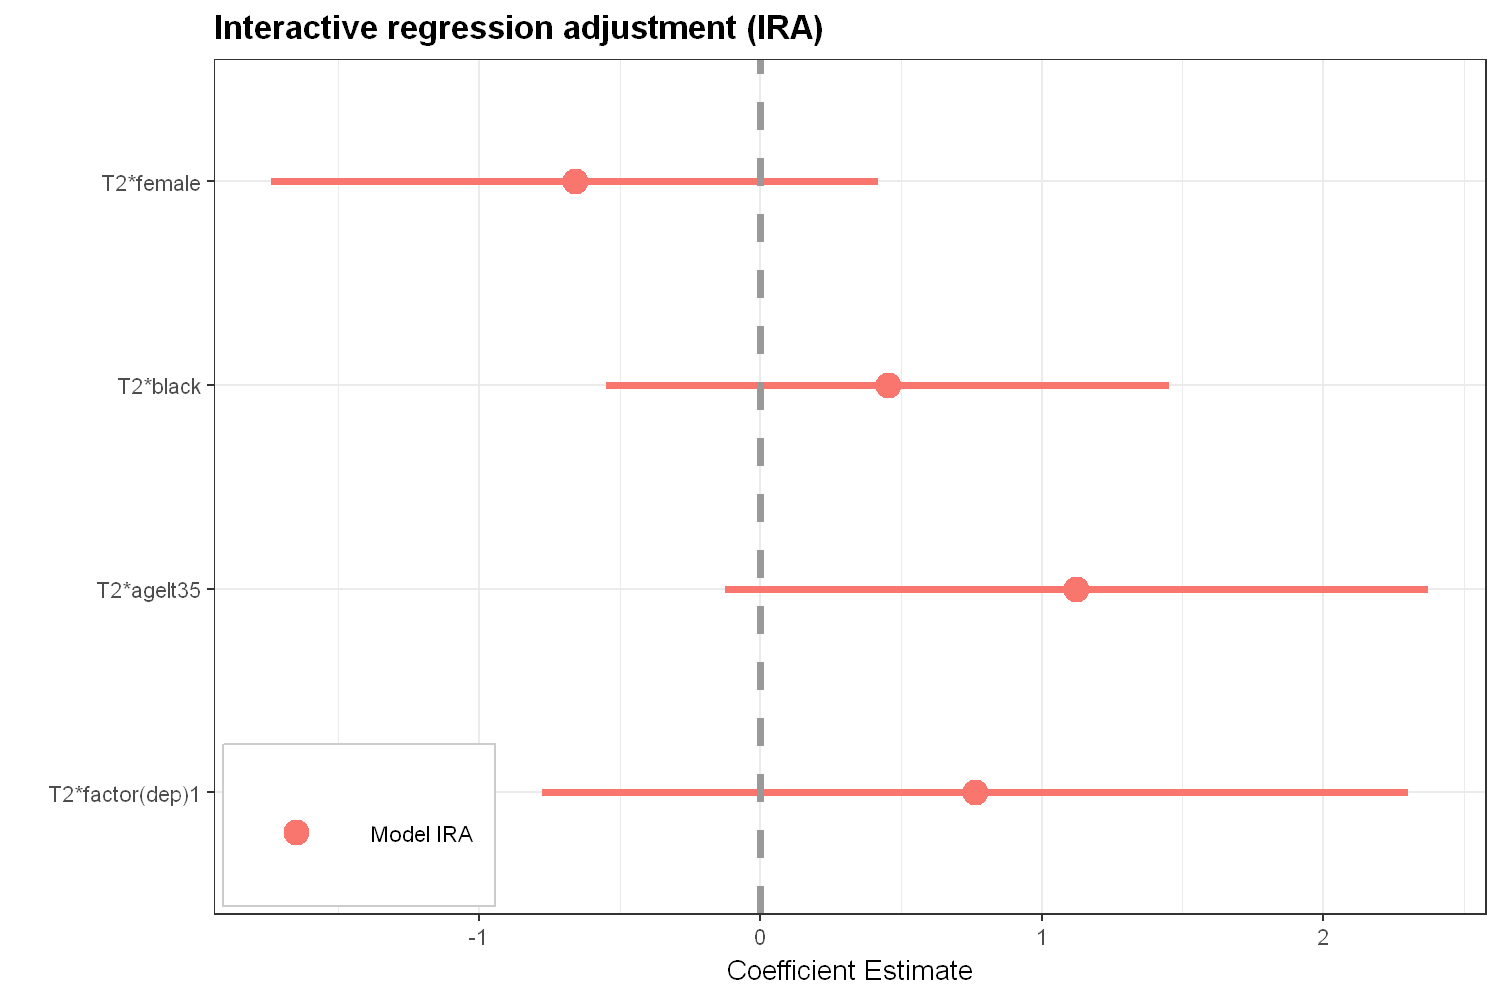

In [119]:
options(repr.plot.width=3, repr.plot.height=2 ,  repr.plot.res = 500)
dwplot(coef_ira , 
       vline = geom_vline(
           xintercept = 0,
           colour = "grey60",
           linetype = 2
       ),
       vars_order = c( "T2TRUE:Xfemale" , "T2TRUE:Xblack" , "T2TRUE:Xagelt35" , "T2TRUE:Xfactor(dep)1" )
       ) %>% # plot line at zero _behind_coefs
    relabel_predictors(
        c(
            "T2TRUE:Xfemale" = "T2*female",
            "T2TRUE:Xblack" = "T2*black",
            "T2TRUE:Xagelt35" = "T2*agelt35",
            "T2TRUE:Xfactor(dep)1" = "T2*factor(dep)1"
        )
    ) +
    theme_bw(base_size = 4) + 
    # Setting `base_size` for fit the theme
    # No need to set `base_size` in most usage
    xlab("Coefficient Estimate") + ylab("") +
    geom_vline(xintercept = 0,
               colour = "grey60",
               linetype = 2) +
    ggtitle("Interactive regression adjustment (IRA) ") +
    theme(
        plot.title = element_text(face = "bold"),
        legend.position = c(0.007, 0.01),
        legend.justification = c(0, 0),
        legend.background = element_rect(colour = "grey80"),
        legend.title = element_blank()
    )